In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement import core
from kid_readout.measurement.io import nc

In [4]:
filename = '/data/detectors/2016-06-15_175304_sweep_stream.nc'
ncf = nc.NCFile(filename)

In [5]:
ss = [ncf.read(name) for name in ncf.node_names()]

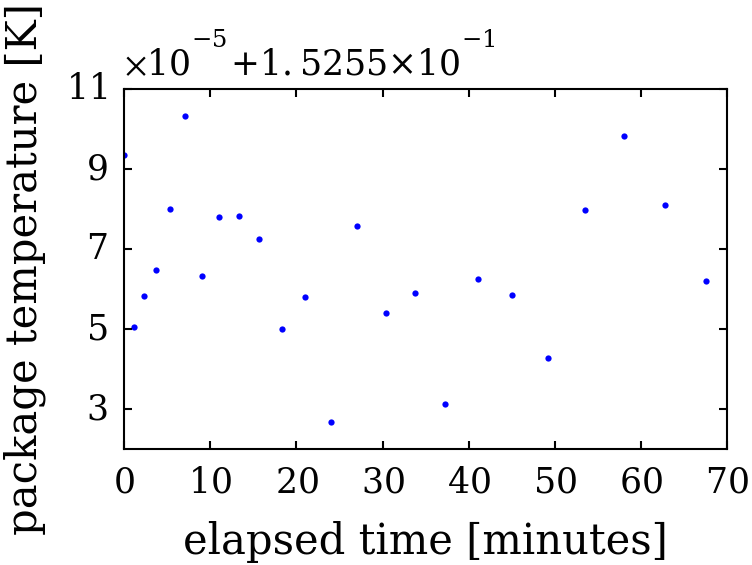

In [6]:
fig, ax = plt.subplots()
ax.plot([(s.stream.epoch - ss[0].stream.epoch) / 60 for s in ss],
        [s.state.temperature.package for s in ss],
        '.b')
ax.set_xlabel('elapsed time [minutes]')
ax.set_ylabel('package temperature [K]');

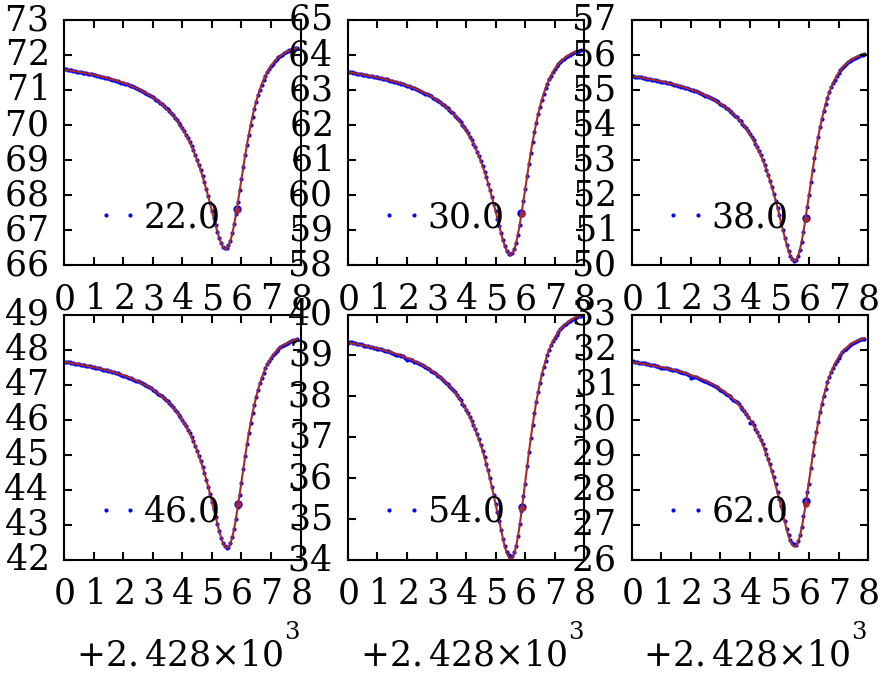

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[0:6], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

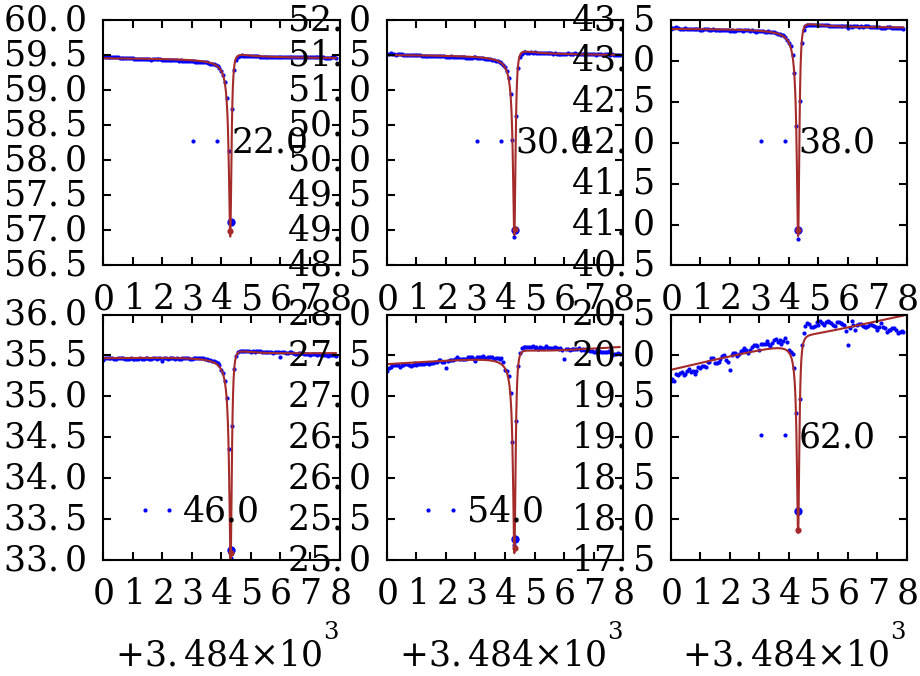

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[6:12], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

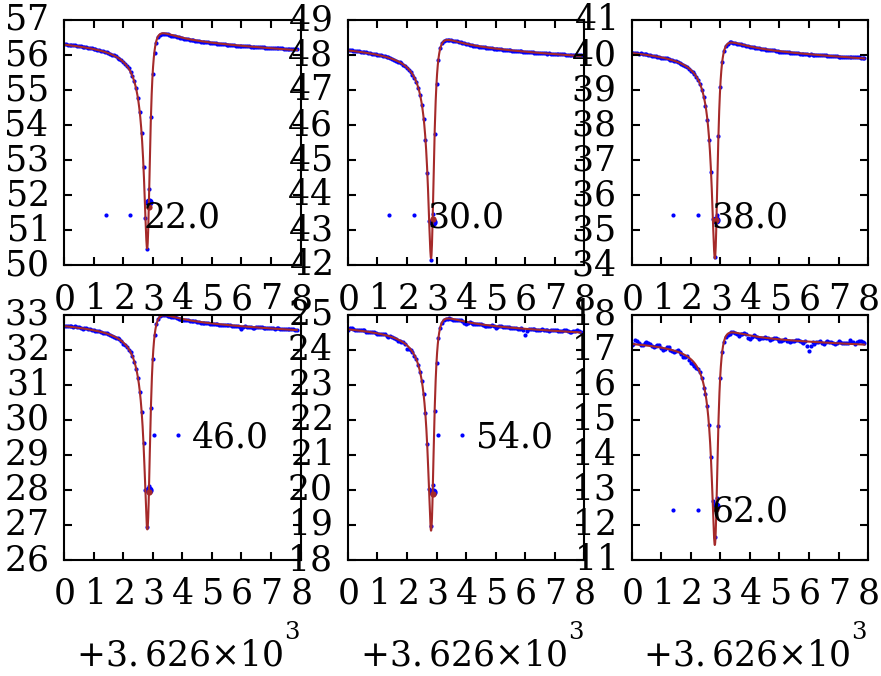

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[12:18], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

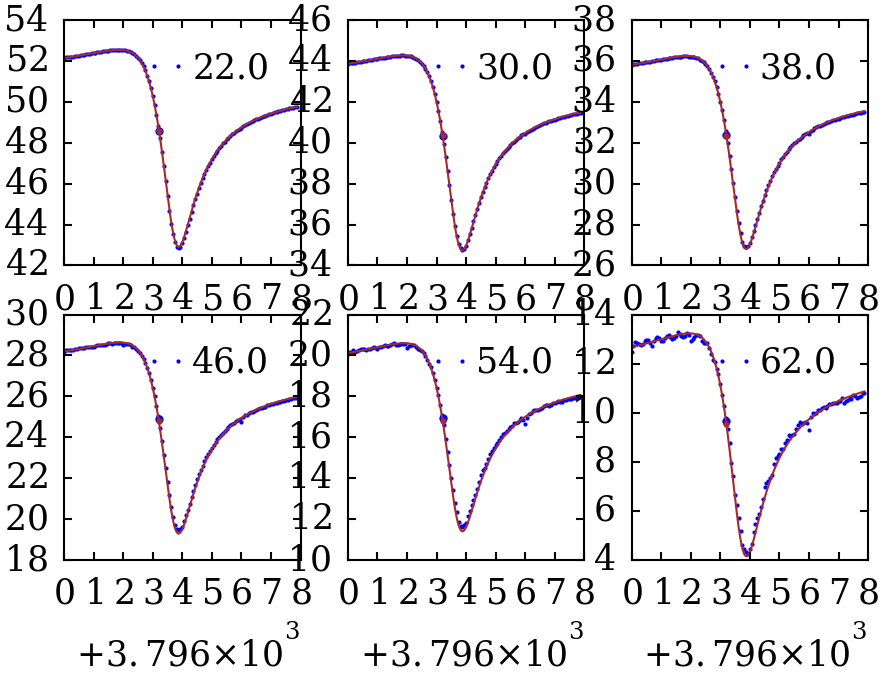

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for s, ax in zip(ss[18:24], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

In [11]:
df = pd.concat([s.to_dataframe() for s in ss])

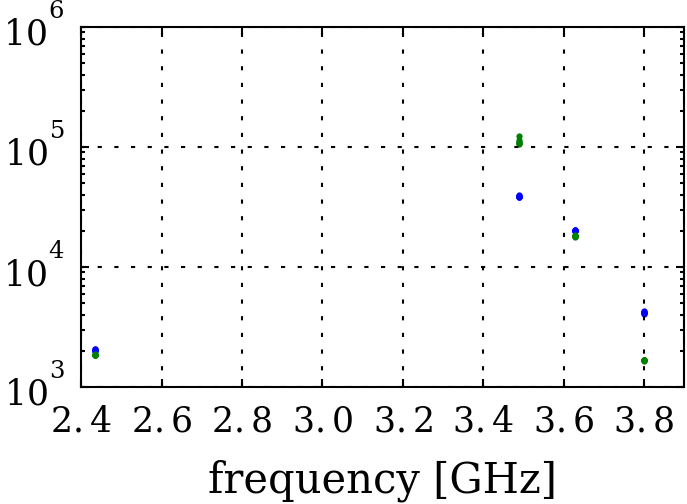

In [12]:
fig, ax = plt.subplots()

ax.plot(1e-9 * df.res_f_0, df.res_Q_i, '.')
ax.plot(1e-9 * df.res_f_0, df.res_Q_e_real, '.')

ax.set_xlim(2.4, 3.9)
ax.set_yscale('log')
ax.set_xlabel('frequency [GHz]')
ax.grid(True);

In [ ]:
fig, ax = plt.subplots()
for 

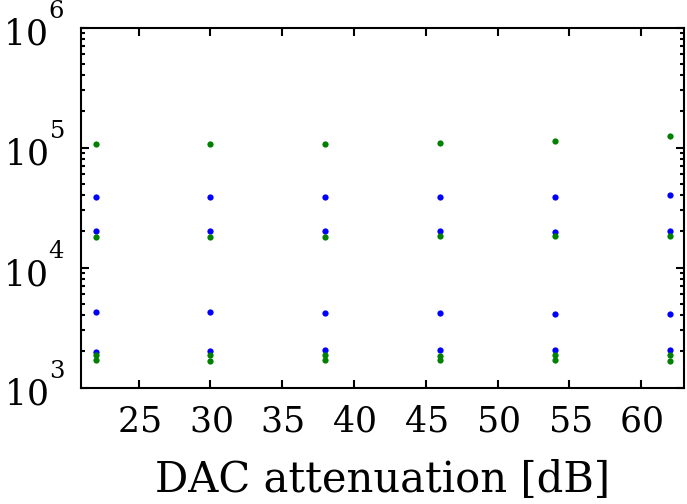

In [13]:
fig, ax = plt.subplots()

ax.plot(df.roach_dac_attenuation, df.res_Q_i, '.')
ax.plot(df.roach_dac_attenuation, df.res_Q_e_real, '.')

ax.set_xlim(21, 63)
ax.set_yscale('log')
ax.set_xlabel('DAC attenuation [dB]');

In [14]:
lo = np.unique(df.roach_lo_frequency)

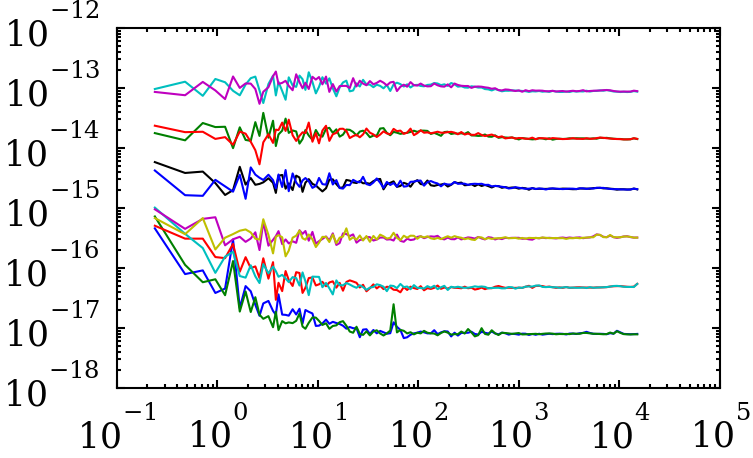

In [15]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[0]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)


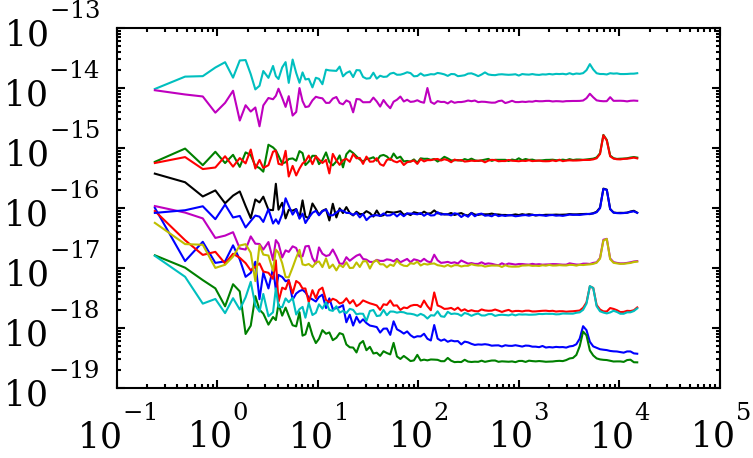

In [16]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[1]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

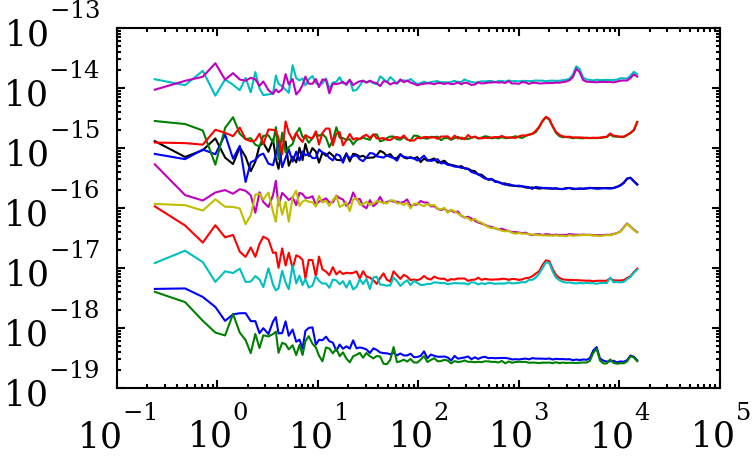

In [17]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[2]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

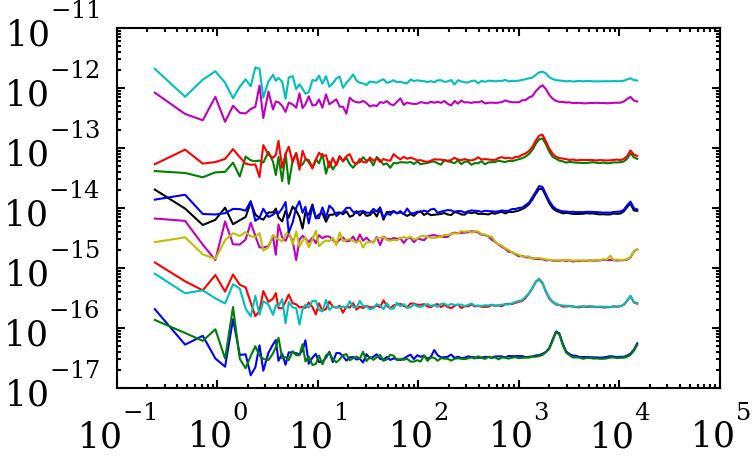

In [18]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[3]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

In [19]:
df.iloc[6:12].res_Q_i

0    38481.965429
0    38740.229707
0    38522.911269
0    38394.646098
0    38747.531179
0    40078.690528
Name: res_Q_i, dtype: float64